<a href="https://colab.research.google.com/github/vvrgit/ANNWorkshop/blob/main/LAB01_Artificial_Neural_Networks_Dr_Venkataramana_Veeramsetty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

#**ANN Without Hidden Layers and Bias and with linear activation functions**

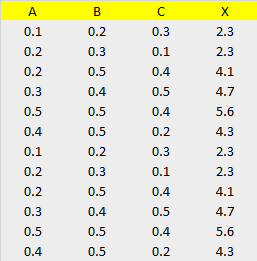

#Data Import

In [ ]:
data=pd.read_excel("/content/drive/MyDrive/NNDL-Data/SampleData-00.xlsx")
data.head()

,A,B,C,X
0,0.1,0.2,0.3,2.3
1,0.2,0.3,0.1,2.3
2,0.2,0.5,0.4,4.1
3,0.3,0.4,0.5,4.7
4,0.5,0.5,0.4,5.6


#Split Data

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.05,random_state=1)
q1=len(data_train)
q2=len(data_test)
data_train=np.array(data_train)
data_test=np.array(data_test)

#Random Weight Initialization

In [ ]:
#Random Weight Initialization
weights=np.random.uniform(-10,10,size=(3,1))
print(weights)

[[-1.3511732 ]
 [ 2.03658672]
 [-5.74080773]]


#Neural Nets Training With SGD

In [ ]:
l=0.001
for i in range(100):
    for j in range(q1):
        o=np.dot(data_train[j,0:3],weights) #n.shape-1,1
        dw=(l*(data_train[[j],3]-o))*data_train[[j],0:3].T
        weights=weights+dw

print(weights)
print(weights.shape)

[[2.5048271 ]
 [7.56588925]
 [5.22683586]]
(3, 1)


# Prediction with testing data

In [ ]:
pred_test=np.zeros((q2,1))
for j in range(q2):
    n2=np.dot(data_test[j,0:3],weights) #n.shape-1,
    pred_test[j]=n2
pred_test

array([[6.37474083]])

#Prediction with training data

In [ ]:
pred_train=np.zeros((q1,1))
for j in range(q1):
    n2=np.dot(data_train[j,0:3],weights) #n.shape-1,
    pred_train[j]=n2
pred_train

array([[6.39072146],
       [7.12602217],
       [7.12602217],
       [3.29381776],
       [3.33135018],
       [3.33135018],
       [3.29381776],
       [5.83078301],
       [6.39072146],
       [6.37474083],
       [5.83078301]])

#Error Calculation

In [ ]:
from sklearn.metrics import mean_squared_error
print("Training MSE:",mean_squared_error(data_train[:,3],pred_train))
print("Testing MSE:",mean_squared_error(data_test[:,3],pred_test))

Training MSE: 0.3732769517130052
Testing MSE: 0.0754825213846656


#Deployment

In [ ]:
inputvector=np.zeros((1,3))
for j in range(3):
  A=input("enter value")
  inputvector[0,j]=A
Pred=np.dot(inputvector[0,0:3],weights)
print("Predicted Output:",Pred)

enter value0.2
enter value0.3
enter value0.1
Predicted Output: [3.29381776]


# **ANN Without Hidden Layer and with linear activation functions and bias**

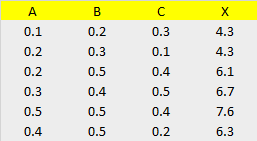

#Data Import

In [ ]:
data=pd.read_excel("/content/drive/MyDrive/NNDL-Data/SampleData-01.xlsx")
data.head()

,A,B,C,X
0,0.1,0.2,0.3,4.3
1,0.2,0.3,0.1,4.3
2,0.2,0.5,0.4,6.1
3,0.3,0.4,0.5,6.7
4,0.5,0.5,0.4,7.6


#Split Data

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.05,random_state=1)
q1=len(data_train)
q2=len(data_test)
data_train=np.array(data_train)
data_test=np.array(data_test)

#Random initilization of Weigthts and Bias Parameters

In [ ]:
#Random Weight Initialization
weights=np.random.uniform(-10,10,size=(3,1))
bias=np.random.uniform(-10,10,size=(1,1))
print(weights)
print(bias)

[[-8.84271316]
 [ 0.71066233]
 [-0.48567582]]
[[-9.37996592]]


##Learning with SGD

In [ ]:
l=0.001
for i in range(10000):
    for j in range(q1):
        o=np.dot(data_train[j,0:3],weights)+bias #n.shape-1,1
        dw=(l*(data_train[[j],3]-o))*data_train[[j],0:3].T
        db=(l*(data_train[[j],3]-o))
        weights=weights+dw
        bias=bias+db
print(bias)
print(weights.shape)
print(dw.shape)

[[1.80787923]]
(3, 1)
(3, 1)


#Prediction on Testing Data

In [ ]:
pred_test=np.zeros((q2,1))
for j in range(q2):
    n2=np.dot(data_test[j,0:3],weights)+bias #n.shape-1,
    pred_test[j]=n2
pred_test

array([[7.39708568]])

#Testing Error

In [ ]:
from sklearn.metrics import mean_squared_error
print("Testing MSE:",mean_squared_error(data_test[:,3],pred_test))

Testing MSE: 1.6824312661585616


#Prediction on Training Data

In [ ]:
pred_train=np.zeros((q1,1))
for j in range(q1):
    n2=np.dot(data_train[j,0:3],weights)+bias #n.shape-1,
    pred_train[j]=n2
pred_train

array([[2.65259137],
       [5.22602146],
       [2.81555341],
       [5.07855719],
       [4.48410717]])

#Training Error

In [ ]:
from sklearn.metrics import mean_squared_error
print("Training MSE:",mean_squared_error(data_train[:,3],pred_train))

Testing MSE: 3.295970903954867


#Deployment

In [ ]:
inputvector=np.zeros((1,3))
for j in range(3):
  A=input("enter value")
  inputvector[0,j]=A
Pred=np.dot(inputvector[0,0:3],weights)+bias
print("Predicted Output:",Pred)

enter value0.1
enter value0.2
enter value0.3
Predicted Output: [[4.62343264]]


# **ANN Without Hidden Layer and with non-linear activation functions and bias**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# **Import Data**

In [ ]:
data=pd.read_excel("/content/drive/MyDrive/NNDL-Data/Sample_Data_Sigmoid.xlsx")
data.head()

,A,B,C,X
0,0.1,0.2,0.3,0.967705
1,0.2,0.3,0.4,0.947846
2,0.3,0.4,0.5,0.916827
3,0.4,0.5,0.6,0.869892
4,0.5,0.6,0.7,0.802184


# **Data Split**

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.05,random_state=1)
q1=len(data_train)
q2=len(data_test)
data_train=np.array(data_train)
data_test=np.array(data_test)

# **Random Weight & Bias Initialization**

In [ ]:
#Random Weight Initialization
weights=np.random.uniform(-10,10,size=(3,1))
bias=np.random.uniform(-10,10,size=(1,1))
print(weights)
print(bias)

[[-2.45445329]
 [-9.53041324]
 [-2.40797268]]
[[-3.82858947]]


# **Training of ANN with SGD based BPA**

In [ ]:
l=0.1
for i in range(10000):
    for j in range(q1):
        z=np.dot(data_train[j,0:3],weights)+bias #n.shape-1,1
        o=1/(1+np.exp(-z))
        dw=(l*(data_train[[j],3]-o))*o*(1-o)*data_train[[j],0:3].T
        db=(l*(data_train[[j],3]-o))*o*(1-o)
        weights=weights+dw
        bias=bias+db
print(bias)
print(weights)

[[4.52441332]]
[[-0.31684586]
 [-6.55750553]
 [ 1.40023531]]


# **Prediction on Test Data**

In [ ]:
pred_test=np.zeros((q2,1))
for j in range(q2):
    z=np.dot(data_test[j,0:3],weights)+bias #n.shape-1,
    o=1/(1+np.exp(-z))
    pred_test[j]=o
pred_test

array([[0.57855116]])

# **Testing Error**

In [ ]:
from sklearn.metrics import mean_squared_error
print("Testing MSE:",mean_squared_error(data_test[:,3],pred_test))

Testing MSE: 0.0004054786911448118


# **Predictions on Training Data**

In [ ]:
pred_train=np.zeros((q1,1))
for j in range(q1):
    z=np.dot(data_train[j,0:3],weights)+bias #n.shape-1,
    o=1/(1+np.exp(-z))
    pred_train[j]=o
pred_train

array([[0.9245945 ],
       [0.95495003],
       [0.9734366 ],
       [0.80402634],
       [0.87643156],
       [0.70354579]])

# **Training Error**

In [ ]:
from sklearn.metrics import mean_squared_error
print("Training MSE:",mean_squared_error(data_train[:,3],pred_train))

Training MSE: 4.077140222640331e-05


# **Deployment**

In [ ]:
inputvector=np.zeros((1,3))
for j in range(3):
  A=input("enter value")
  inputvector[0,j]=A
z=np.dot(inputvector[0,0:3],weights)+bias
Pred=1/(1+np.exp(-z))
print("Predicted Output:",Pred)

enter value0.1
enter value0.2
enter value0.3
Predicted Output: [[0.9734366]]


#**ANN With Hidden Layer and with linear activation functions and no bias**

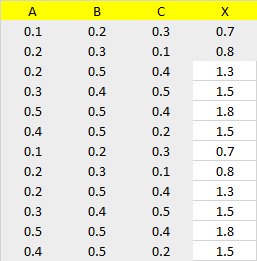

#Data Import

In [ ]:
data=pd.read_excel("/content/drive/MyDrive/NNDL-Data/SampleData_03.xlsx")
data.head()

,A,B,C,X
0,0.1,0.2,0.3,0.734056
1,0.2,0.3,0.1,0.782396
2,0.2,0.5,0.4,1.349732
3,0.3,0.4,0.5,1.519960
4,0.5,0.5,0.4,1.849891


# Data Split

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.05,random_state=1)
q1=len(data_train)
q2=len(data_test)
data_train=np.array(data_train)
data_test=np.array(data_test)

# Random weight initialization

In [ ]:
# Random weight initialization
w_ij=np.random.uniform(-1,1,size=(3,5))
w_jk=np.random.uniform(-1,1,size=(5,1))
print(w_ij.shape,w_ij)
print(w_jk.shape,w_jk)


(3, 5) [[-0.27577332  0.53999253  0.50265186  0.90369886  0.66750935]
 [-0.96722496  0.00233453  0.37918121 -0.78894453 -0.23294348]
 [ 0.63614768  0.79308551  0.59382628 -0.28449337 -0.45206324]]
(5, 1) [[ 0.48910975]
 [-0.14569288]
 [ 0.88064351]
 [ 0.22210074]
 [-0.72495381]]


#Forward pass

In [ ]:
#Forward pass
def forward_pass(a,w_ij,w_jk,j):
    o_j=np.dot(a[[j],0:3],w_ij)
    o_k=np.dot(o_j,w_jk)
    return o_j,o_k

#Backward pass

In [ ]:
#Backward pass
def weights_updation_bp(a,l,o_j,o_k,w_ij,w_jk,j):
    dw_ij=np.zeros((3,5))
    dw_jk=np.dot(l*(a[[j],3]-o_k),o_j)
    w_jk=w_jk+dw_jk.T
    for k in range(5):
        dw_ij[:,k]=np.dot(l*(a[[j],3]-o_k)*w_jk[[k]],a[[j],0:3])
    w_ij=w_ij+dw_ij
    return w_jk,w_ij

#Neural Nets Training With SGD

In [ ]:
#Neural Nets
l=0.001
for i in range(100):
    for j in range(q1):
        o_j,o_k=forward_pass(data_train,w_ij,w_jk,j)
        w_jk,w_ij=weights_updation_bp(data_train,l,o_j,o_k,w_ij,w_jk,j)
print(w_jk)
print(w_ij)

[[ 0.32768537]
 [ 0.11914646]
 [ 1.2812513 ]
 [ 0.16505156]
 [-0.78853858]]
[[-1.89270366e-01  5.37764721e-01  7.31572791e-01  9.44251757e-01
   5.07267523e-01]
 [-8.59009100e-01 -6.89985676e-04  6.64810262e-01 -7.38231376e-01
  -4.33078886e-01]
 [ 7.14687870e-01  7.90234093e-01  7.99029400e-01 -2.47736434e-01
  -5.96395699e-01]]


# Output prediction with test data

In [ ]:
pred_test=np.zeros((q2,1))
for z in range(q2):
    _,pred_test[z]=forward_pass(data_test,w_ij,w_jk,z)
print(pred_test.shape)

(1, 1)


# Output prediction with train data

In [ ]:
pred_train=np.zeros((q1,1))
for z in range(q1):
    _,pred_train[z]=forward_pass(data_train,w_ij,w_jk,z)
print(pred_train.shape)

(11, 1)


# Testing and Training Errors

In [ ]:
from sklearn.metrics import mean_squared_error
print("Testing MSE:",mean_squared_error(data_test[:,3],pred_test))
print("Training MSE:",mean_squared_error(data_train[:,3],pred_train))

Testing MSE: 0.010639938312227908
Training MSE: 0.07360597996403402


# Deployment

In [ ]:
inputvector=np.zeros((1,3))
for j in range(3):
  A=input("enter value")
  inputvector[0,j]=A
_,p=forward_pass(inputvector,w_ij,w_jk,0)
print("Predicted Output:",p)

enter value0.1
enter value0.2
enter value0.3
Predicted Output: [[0.76194676]]


#**ANN With Hidden Layer and with linear activation functions and with bias**

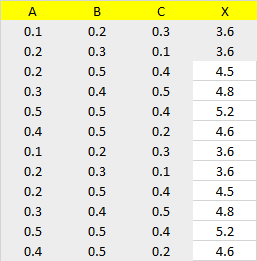

#Data Import

In [ ]:
data=pd.read_excel("/content/drive/MyDrive/NNDL-Data/SampleData_02.xlsx")
data.head()

,A,B,C,X
0,0.1,0.2,0.3,3.567146
1,0.2,0.3,0.1,3.558730
2,0.2,0.5,0.4,4.475214
3,0.3,0.4,0.5,4.760498
4,0.5,0.5,0.4,5.193062


#Data Split

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.05,random_state=1)
q1=len(data_train)
q2=len(data_test)
data_train=np.array(data_train)
data_test=np.array(data_test)

# Random weight initialization

In [ ]:
# Random weight initialization
w_ij=np.random.uniform(-1,1,size=(3,5))
w_jk=np.random.uniform(-1,1,size=(5,1))
b_j=np.random.uniform(-1,1,size=(5,1))
b_k=np.random.uniform(-1,1,size=(1,1))
print(w_ij.shape,w_ij)
print(w_jk.shape,w_jk)
print(b_j)
print(b_k)

(3, 5) [[ 0.54952526 -0.67417491 -0.68918228 -0.5034661   0.83978525]
 [-0.67752303 -0.16702285 -0.68106389  0.78012417  0.54508554]
 [-0.72203053  0.16308885  0.43577771  0.64534498  0.35921919]]
(5, 1) [[-0.89865943]
 [-0.02821834]
 [-0.60203739]
 [ 0.45114405]
 [-0.39270619]]
[[ 0.48896581]
 [-0.56540245]
 [ 0.20074502]
 [ 0.33163684]
 [ 0.12586429]]
[[-0.91346263]]


#Forward pass

In [ ]:
#Forward pass
def forward_pass(a,w_ij,w_jk,b_j,b_k,j):
    o_j=np.dot(a[[j],0:3],w_ij)+b_j.T
    o_k=np.dot(o_j,w_jk)+b_k
    return o_j,o_k

#Backward pass

In [ ]:
#Backward pass
def weights_updation_bp(a,l,o_j,o_k,w_ij,w_jk,b_j,b_k,j):
    dw_ij=np.zeros((3,5))
    db_j=np.zeros((1,5))
    dw_jk=np.dot(l*(a[[j],3]-o_k),o_j)
    w_jk=w_jk+dw_jk.T
    db_k=l*(a[[j],3]-o_k)
    b_k=b_k+db_k
    for k in range(5):
        dw_ij[:,k]=np.dot(l*(a[[j],3]-o_k)*w_jk[[k]],a[[j],0:3])
        db_j[:,k]=l*(a[[j],3]-o_k)*w_jk[[k]]
    w_ij=w_ij+dw_ij
    b_j=b_j+db_j.T
    return w_jk,w_ij,b_j,b_k

#Neural Nets Training With SGD

In [ ]:
#Neural Nets
l=0.001
for i in range(100):
    for j in range(q1):
        o_j,o_k=forward_pass(data_train,w_ij,w_jk,b_j,b_k,j)
        w_jk,w_ij,b_j,b_k=weights_updation_bp(data_train,l,o_j,o_k,w_ij,w_jk,b_j,b_k,j)
print(w_jk)
print(w_ij)
print(b_j)
print(b_k)

[[-1.13438248]
 [-0.72000106]
 [-0.97748059]
 [ 1.23355359]
 [ 0.06552336]]
[[ 0.32077911 -0.75998762 -0.86704805 -0.31176792  0.80427951]
 [-0.96577221 -0.27240831 -0.90430592  1.01903505  0.49806274]
 [-0.95550325  0.07691278  0.25471777  0.8396571   0.32181846]]
[[-0.23506005]
 [-0.83112529]
 [-0.36030721]
 [ 0.93271333]
 [ 0.0085577 ]]
[[-0.15636649]]


#Output prediction with test data

In [ ]:
pred_test=np.zeros((q2,1))
for z in range(q2):
    _,pred_test[z]=forward_pass(data_test,w_ij,w_jk,b_j,b_k,z)
print(pred_test.shape)

(1, 1)


#Output prediction with train data

In [ ]:
pred_train=np.zeros((q1,1))
for z in range(q1):
    _,pred_train[z]=forward_pass(data_train,w_ij,w_jk,b_j,b_k,z)
print(pred_train.shape)

(11, 1)


# Error Calculations

In [ ]:
from sklearn.metrics import mean_squared_error
print("Testing MSE:",mean_squared_error(data_test[:,3],pred_test))
print("Training MSE:",mean_squared_error(data_train[:,3],pred_train))

Testing MSE: 0.11818571153604214
Training MSE: 0.016538975253280713


#Deployment

In [ ]:
0inputvector=np.zeros((1,3))
for j in range(3):
  A=input("enter value")
  inputvector[0,j]=A
_,p=forward_pass(inputvector,w_ij,w_jk,b_j,b_k,0)
print("Predicted Output:",p)

enter value0.1
enter value0.2
enter value.3
Predicted Output: [[3.52587174]]


#**ANN With Hidden Layer and with Non-linear activation functions and with bias**

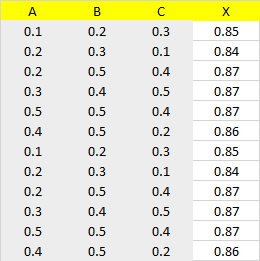

#Data Import

In [ ]:
data=pd.read_excel("/content/drive/MyDrive/NNDL-Data/SampleData-04.xlsx")
data.head()

,A,B,C,X
0,0.1,0.2,0.3,0.846616
1,0.2,0.3,0.1,0.843727
2,0.2,0.5,0.4,0.865661
3,0.3,0.4,0.5,0.869099
4,0.5,0.5,0.4,0.873374


# Data Split

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.05,random_state=1)
q1=len(data_train)
q2=len(data_test)
data_train=np.array(data_train)
data_test=np.array(data_test)

# Random weight initialization

In [ ]:
# Random weight initialization
w_ij=np.random.uniform(-1,1,size=(3,5))
w_jk=np.random.uniform(-1,1,size=(5,1))
b_j=np.random.uniform(-1,1,size=(5,1))
b_k=np.random.uniform(-1,1,size=(1,1))
print(w_ij.shape,w_ij)
print(w_jk.shape,w_jk)
print(b_j)
print(b_k)

(3, 5) [[ 0.92710257  0.97215585 -0.74561432 -0.25471173  0.99289465]
 [ 0.21631074 -0.42417696 -0.95677398  0.45751199  0.93546366]
 [-0.83431944 -0.33668173 -0.56367549 -0.72678214  0.05380781]]
(5, 1) [[ 0.69501923]
 [-0.76152543]
 [ 0.22433378]
 [ 0.12710262]
 [-0.34368348]]
[[-0.76960723]
 [ 0.52837459]
 [-0.44956124]
 [ 0.39532705]
 [-0.97188318]]
[[0.14900171]]


#Forward pass

In [ ]:
#Forward pass
def forward_pass(a,w_ij,w_jk,b_j,b_k,j):
    net_j=np.dot(a[[j],0:3],w_ij)+b_j.T
    o_j=1/(1+np.exp(-net_j))
    net_k=np.dot(o_j,w_jk)+b_k
    o_k=1/(1+np.exp(-net_k))
    return o_j,o_k

#Backward pass

In [ ]:
#Backward pass
def weights_updation_bp(a,l,o_j,o_k,w_ij,w_jk,b_j,b_k,j):
    dw_ij=np.zeros((3,5))
    db_j=np.zeros((1,5))
    dw_jk=np.dot(l*(a[[j],3]-o_k)*(o_k*(1-o_k)),o_j)
    w_jk=w_jk+dw_jk.T
    db_k=l*(a[[j],3]-o_k)*(o_k*(1-o_k))
    b_k=b_k+db_k
    for k in range(5):
        dw_ij[:,k]=np.dot(l*(a[[j],3]-o_k)*(o_k*(1-o_k))*w_jk[[k]]*o_j[0,k]*(1-o_j[0,k]),a[[j],0:3])
        db_j[:,k]=l*(a[[j],3]-o_k)*(o_k*(1-o_k))*w_jk[[k]]*o_j[0,k]*(1-o_j[0,k])
    w_ij=w_ij+dw_ij
    b_j=b_j+db_j.T
    return w_jk,w_ij,b_j,b_k

#Neural Nets Training with SGD

In [ ]:
#Neural Nets
l=0.001
for i in range(100):
    for j in range(q1):
        o_j,o_k=forward_pass(data_train,w_ij,w_jk,b_j,b_k,j)
        w_jk,w_ij,b_j,b_k=weights_updation_bp(data_train,l,o_j,o_k,w_ij,w_jk,b_j,b_k,j)
print(w_jk)
print(w_ij)
print(b_j)
print(b_k)

[[ 0.72896904]
 [-0.69893644]
 [ 0.24719824]
 [ 0.18358162]
 [-0.30116944]]
[[ 0.93187768  0.96719846 -0.74446137 -0.25358994  0.99056292]
 [ 0.22262744 -0.43083135 -0.95520398  0.45900797  0.9323682 ]
 [-0.82939692 -0.34200887 -0.56242388 -0.72558646  0.0513611 ]]
[[-0.75378495]
 [ 0.51148335]
 [-0.44545279]
 [ 0.39910805]
 [-0.97962379]]
[[0.24842449]]


#Prediction with testing data

In [ ]:
pred_test=np.zeros((q2,1))
for z in range(q2):
    _,pred_test[z]=forward_pass(data_test,w_ij,w_jk,b_j,b_k,z)
print(pred_test.shape)

(1, 1)


#Prediction with training data

In [ ]:
pred_train=np.zeros((q1,1))
for z in range(q1):
    _,pred_train[z]=forward_pass(data_train,w_ij,w_jk,b_j,b_k,z)
print(pred_train.shape)

(11, 1)


#Error Computation

In [ ]:
from sklearn.metrics import mean_squared_error
print("Testing MSE:",mean_squared_error(data_test[:,3],pred_test))
print("Training MSE:",mean_squared_error(data_train[:,3],pred_train))

Testing MSE: 0.11686793612711564
Training MSE: 0.1131215773762695


#Deployment

In [ ]:
inputvector=np.zeros((1,3))
for j in range(3):
  A=input("enter value")
  inputvector[0,j]=A
_,p=forward_pass(inputvector,w_ij,w_jk,b_j,b_k,0)
print("Predicted Output:",p)

enter value0.1
enter value0.2
enter value0.3
Predicted Output: [[0.52920896]]


# ***Data Processing***

---



In [ ]:
data=pd.read_csv("/content/drive/MyDrive/PROJECT_Final.csv")
data.head()
min_load=data.min()
print(min_load)
max_load=data.max()
print(max_load)


Load    3377.9196
dtype: float64
Load    8841.66948
dtype: float64


In [ ]:
data.head()

,Load
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
data=ms.fit_transform(data)
print(data)
print(data.shape)

[[0.39787738]
 [0.29380046]
 [0.27645431]
 ...
 [0.24629825]
 [0.32438447]
 [0.65165045]]
(2184, 1)


In [ ]:
a=np.zeros((len(data)-72,7))
print(a.shape)

(2112, 7)


In [ ]:
k=72
for i in range(2112):
    a[i,0],a[i,1],a[i,2],a[i,3],a[i,4],a[i,5],a[i,6]=data[k-1],data[k-2],data[k-3],data[k-24],data[k-48],data[k-72],data[k]
    k=k+1
print(a)

[[0.44580754 0.55202419 0.4649796  ... 0.28430002 0.39787738 0.41017375]
 [0.41017375 0.44580754 0.55202419 ... 0.25579869 0.29380046 0.36723631]
 [0.36723631 0.41017375 0.44580754 ... 0.24450087 0.27645431 0.30646772]
 ...
 [0.21779692 0.22852415 0.3052124  ... 0.63393341 0.66531625 0.24629825]
 [0.24629825 0.21779692 0.22852415 ... 0.48380931 0.47074263 0.32438447]
 [0.32438447 0.24629825 0.21779692 ... 0.39228553 0.4173918  0.65165045]]


In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
a,a_test=train_test_split(a,test_size=0.05,random_state=1)
print(a.shape)
print(a_test.shape)
q1=len(a)
print(q1)
q2=len(a_test)
print(q2)

(2006, 7)
(106, 7)
2006
106


# ***Delta Learning***

---



In [ ]:
#Random Weight Initialization
weights=np.random.uniform(-1,1,size=(6,1))
print(weights.shape)
print(weights)

(6, 1)
[[-0.29832084]
 [ 0.36027509]
 [-0.29548685]
 [ 0.06927126]
 [-0.89495933]
 [ 0.67729431]]


In [ ]:
#Delta Learning

l=0.001
for i in range(100):
    for j in range(q1):
        n=np.dot(a[j,0:6],weights) #n.shape-1,1
        o=1/(1+np.exp(-n))
        dw=(l*(a[[j],6]-o))*o*(1-o)*a[[j],0:6].T
        #dw3=dw3.reshape((6,1))
        weights=weights+dw
print(dw)
print(weights)

[[-2.27875913e-05]
 [-2.17215535e-05]
 [-2.32834229e-05]
 [-2.13620757e-05]
 [-2.97540245e-05]
 [-2.54898733e-05]]
[[ 0.13647038]
 [ 0.3673168 ]
 [-0.67840376]
 [ 0.36185198]
 [-0.62537751]
 [ 0.66645002]]


In [ ]:
#Delta Learning Testing
o2=np.zeros((q2,1))
for j in range(q2):
    n2=np.dot(a_test[j,0:6],weights) #n.shape-1,1
    o2[j]=1/(1+np.exp(-n2))

from sklearn.metrics import mean_squared_error
print(mean_squared_error(a_test[:,6],o2))

0.03531187180751741


In [ ]:
# Prediction
c=10
n=np.dot(a[c,0:6],weights) #n.shape-1,1
o=1/(1+np.exp(-n))
Actual_load=a[c,6]*(max_load-min_load)+min_load
Estimated_Load=o*(max_load-min_load)+min_load
print('Actual Load=', Actual_load)
print('Estimated Load=', Estimated_Load)

Actual Load= Load    5260.01472
dtype: float64
Estimated Load= Load    6315.511975
dtype: float64


# ***Percepton Learning***

---



In [ ]:
#Random Weight Initialization
weights=np.random.uniform(-1,1,size=(6,1))
print(weights.shape)

(6, 1)


In [ ]:
#Percepton Learning

l=0.001
for i in range(10):
    for j in range(q1):
        n=np.dot(a[j,0:6],weights) #n.shape-1,1
        if(n>0):
            o=1
        else:
            o=0
        dw=(l*(a[j,6]-o))*a[j,0:6].T
        dw=dw.reshape((6,1))
        weights=weights+dw
print(dw)
print(weights)

[[6.77113098e-05]
 [6.45436728e-05]
 [6.91846293e-05]
 [6.34755162e-05]
 [8.84114491e-05]
 [7.57409012e-05]]
[[ 0.50303686]
 [-0.14353898]
 [-0.16888725]
 [ 0.19314818]
 [-0.29764288]
 [-0.07387492]]


# ***Widrow-Hoff Learning***

---



In [ ]:
#Random Weight Initialization
weights=np.random.uniform(-1,1,size=(6,1))
print(weights.shape)
weights

(6, 1)


array([[-0.39159472],
       [-0.53759037],
       [ 0.93248705],
       [-0.78428862],
       [ 0.0069686 ],
       [-0.85695806]])

In [ ]:
#Widrow-Hoff

l=0.001

for i in range(100):
    for j in range(q1):
        o=np.dot(a[j,0:6],weights) #n.shape-1,1
        dw=(l*(a[j,6]-o))*a[j,0:6].T
        dw=dw.reshape((6,1))
        weights=weights+dw
print(dw)
print(weights)

[[2.03853730e-05]
 [1.85947561e-05]
 [1.81064061e-05]
 [2.34523265e-05]
 [2.84798829e-05]
 [2.26715426e-05]]
[[ 0.5788431 ]
 [-0.13135506]
 [ 0.01930878]
 [ 0.24381316]
 [ 0.25767233]
 [ 0.02594959]]


In [ ]:
#Widro-off Testing
n3=np.zeros((q2,1))
j=0
for j in range(q2):
    n3[j]=np.dot(a_test[j,0:6],weights)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(a_test[:,6],n3))

0.007314848062021888


In [ ]:
# Prediction
c=100
n=np.dot(a[c,0:6],weights) #n.shape-1,1
o=1/(1+np.exp(-n))
print(o*(max_load-min_load)+min_load)
print(a[c,6]*(max_load-min_load)+min_load)

Load    6757.61198
dtype: float64
Load    5551.82208
dtype: float64


# ***Back Propagation Algorithm - Stochastic Gradient Descent Optimizer***

---



In [ ]:
# Random weight initialization
w_ij=np.random.uniform(-1,1,size=(6,9))
w_jk=np.random.uniform(-1,1,size=(9,1))
print(w_ij.shape,w_ij)
print(w_jk.shape,w_jk)

(6, 9) [[ 0.93410017 -0.91271821 -0.34698647  0.37964272 -0.63813272  0.61039617
  -0.3514206  -0.53537795 -0.16252741]
 [-0.71409316  0.43174551  0.31885926  0.17864442  0.60414486 -0.08464413
  -0.44913082  0.49128528  0.5188757 ]
 [-0.31126775  0.96951305 -0.44973253 -0.2417703  -0.57619448 -0.50932763
   0.22203198  0.38507399 -0.04650432]
 [-0.19348653 -0.79448878 -0.12697184 -0.48923432 -0.47741611 -0.70671851
   0.33754948  0.31261379 -0.66144141]
 [-0.42696741 -0.72047922 -0.90561177 -0.67955624 -0.18866626 -0.59901513
  -0.23964764  0.52556195 -0.79662094]
 [ 0.52308126 -0.75822084 -0.0191776  -0.53283572  0.86380626 -0.49745967
  -0.62565482  0.70760458 -0.01781437]]
(9, 1) [[-0.35785629]
 [-0.3884317 ]
 [ 0.61085262]
 [ 0.79169367]
 [-0.22617291]
 [ 0.74153883]
 [ 0.28299371]
 [ 0.20544974]
 [-0.62742991]]


In [ ]:
#Forward pass
def forward_pass(a,w_ij,w_jk,j):
    net_j=np.dot(a[[j],0:6],w_ij)
    o_j=1/(1+np.exp(-net_j))
    net_k=np.dot(o_j,w_jk)
    o_k=1/(1+np.exp(-net_k))
    return o_j,o_k

In [ ]:
#Backward pass
def weights_updation_bp(a,l,o_j,o_k,w_ij,w_jk,j):
    dw_ij=np.zeros((6,9))
    dw_jk=np.dot(l*(a[[j],6]-o_k)*(o_k*(1-o_k)),o_j)
    w_jk=w_jk+dw_jk.T
    for k in range(9):
        dw_ij[:,k]=np.dot(l*(a[[j],6]-o_k)*(o_k*(1-o_k))*w_jk[[k]]*o_j[0,k]*(1-o_j[0,k]),a[[j],0:6])
    w_ij=w_ij+dw_ij
    return w_jk,w_ij

In [ ]:
#Neural Nets
l=0.001
for i in range(100):
    for j in range(q1):
        o_j,o_k=forward_pass(a,w_ij,w_jk,j)
        w_jk,w_ij=weights_updation_bp(a,l,o_j,o_k,w_ij,w_jk,j)
print(w_jk)
print(w_ij)

[[-0.41484726]
 [-0.98747419]
 [ 0.28221441]
 [ 0.54058023]
 [-0.43785199]
 [ 0.43794465]
 [-0.03109253]
 [ 0.51159505]
 [-1.0540135 ]]
[[ 0.7982903  -1.00519466 -0.25347365  0.54382641 -0.75120991  0.73304219
  -0.33231843 -0.48035041 -0.3434718 ]
 [-0.80946503  0.38148986  0.37921379  0.289791    0.52501577 -0.00628541
  -0.43746534  0.52468394  0.40269917]
 [-0.36139872  0.97320675 -0.42800198 -0.19193491 -0.61645341 -0.48153278
   0.22537748  0.3945476  -0.08459965]
 [-0.31711498 -0.865457   -0.04399125 -0.34362873 -0.58000998 -0.59976058
   0.35478135  0.35988331 -0.81625531]
 [-0.53982956 -0.77561748 -0.83265299 -0.54910358 -0.28207727 -0.50423319
  -0.22447354  0.56643766 -0.93104719]
 [ 0.41790317 -0.80331915  0.04768806 -0.41292209  0.77633273 -0.41141824
  -0.61205365  0.74423285 -0.14001941]]


In [ ]:
#Error Calculation
p=np.zeros((q2,1))
for z in range(q2):
    _,p[z]=forward_pass(a_test,w_ij,w_jk,z)
print(p.shape)

(106, 1)


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(a_test[:,6],p))

0.026770603035806022


In [ ]:
c=10
_,p=forward_pass(a,w_ij,w_jk,c)
print(p[0]*(max_load-min_load)+min_load)
print(a[c,6]*(max_load-min_load)+min_load)

Load    5949.921572
dtype: float64
Load    5260.01472
dtype: float64


# ***# Implement ANN with keras - Regression Problem***

---



In [100]:
import numpy as np
import matplotlib.pyplot as plt
import keras  #Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam
#import pylab as plt
#import seaborn as sns #For data visualization
import pandas as pd # For Data manipulation

In [101]:
load_data=pd.read_csv("/content/drive/MyDrive/PROJECT_Final.csv")
load_data.head()

,Load
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [102]:
min_load=load_data.min()
print(min_load)
max_load=load_data.max()
print(max_load)

Load    3377.9196
dtype: float64
Load    8841.66948
dtype: float64


In [103]:
print(load_data.shape) # details about number of samples and features
load_data.describe()

(2184, 1)


,Load
count,2184.000000
mean,6028.125312
std,1066.398766
min,3377.919600
25%,5258.767680
50%,5935.910400
75%,6738.692400
max,8841.669480


In [104]:
load_data.isnull().any()
#load_data = load_data.fillna(method='ffill')

,0
Load,False


In [105]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
load_data=ms.fit_transform(load_data)
print(load_data)

[[0.39787738]
 [0.29380046]
 [0.27645431]
 ...
 [0.24629825]
 [0.32438447]
 [0.65165045]]


In [106]:
load_data_process=np.zeros((len(load_data)-72,7))
print(load_data_process.shape)

(2112, 7)


In [107]:
k=72
for i in range(2112):
    load_data_process[i,0],load_data_process[i,1],load_data_process[i,2],load_data_process[i,3],load_data_process[i,4],load_data_process[i,5],load_data_process[i,6]=load_data[k-1],load_data[k-2],load_data[k-3],load_data[k-24],load_data[k-48],load_data[k-72],load_data[k]
    k=k+1
print(load_data_process)

[[0.44580754 0.55202419 0.4649796  ... 0.28430002 0.39787738 0.41017375]
 [0.41017375 0.44580754 0.55202419 ... 0.25579869 0.29380046 0.36723631]
 [0.36723631 0.41017375 0.44580754 ... 0.24450087 0.27645431 0.30646772]
 ...
 [0.21779692 0.22852415 0.3052124  ... 0.63393341 0.66531625 0.24629825]
 [0.24629825 0.21779692 0.22852415 ... 0.48380931 0.47074263 0.32438447]
 [0.32438447 0.24629825 0.21779692 ... 0.39228553 0.4173918  0.65165045]]


<ipython-input-107-866fea7e26b1>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  load_data_process[i,0],load_data_process[i,1],load_data_process[i,2],load_data_process[i,3],load_data_process[i,4],load_data_process[i,5],load_data_process[i,6]=load_data[k-1],load_data[k-2],load_data[k-3],load_data[k-24],load_data[k-48],load_data[k-72],load_data[k]


In [109]:
dataset=pd.DataFrame(data=load_data_process[0:,0:])
print(dataset[1].values)

[0.55202419 0.44580754 0.41017375 ... 0.22852415 0.21779692 0.24629825]


In [110]:
X=dataset.iloc[:,0:6].values
Y=dataset.iloc[:,6:].values
print(X)
print(Y)

[[0.44580754 0.55202419 0.4649796  0.38115888 0.28430002 0.39787738]
 [0.41017375 0.44580754 0.55202419 0.31479844 0.25579869 0.29380046]
 [0.36723631 0.41017375 0.44580754 0.30840775 0.24450087 0.27645431]
 ...
 [0.21779692 0.22852415 0.3052124  0.68414596 0.63393341 0.66531625]
 [0.24629825 0.21779692 0.22852415 0.51467861 0.48380931 0.47074263]
 [0.32438447 0.24629825 0.21779692 0.41730621 0.39228553 0.4173918 ]]
[[0.41017375]
 [0.36723631]
 [0.30646772]
 ...
 [0.24629825]
 [0.32438447]
 [0.65165045]]


In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(y_test[0:5])
print(X_test.shape)
print(X_train.shape)

[[0.73122022]
 [0.54791589]
 [0.27154717]
 [0.83178797]
 [0.7313914 ]]
(423, 6)
(1689, 6)


In [112]:
  #First_Layer_Size = 32 # Number of neurons in first layer
model=Sequential()
model.add(Dense(32,activation='tanh', input_shape=(6,)))
model.add(Dense(32,activation='tanh'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1,activation='linear'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
 #First_Layer_Size = 32 # Number of neurons in first layer
model=Sequential()
model.add(Dense(32,activation='sigmoid', input_shape=(6,)))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#First_Layer_Size = 32 # Number of neurons in first layer
model=Sequential()
model.add(Dense(32,activation='relu', input_shape=(6,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                224       
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2369 (9.25 KB)
Trainable params: 2369 (9.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#First_Layer_Size = 32 # Number of neurons in first layer
model=Sequential()
model.add(Dense(32,activation='swish', input_shape=(6,)))
model.add(Dense(32,activation='swish'))
model.add(Dense(32,activation='swish'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                224       
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2369 (9.25 KB)
Trainable params: 2369 (9.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
model.compile(loss='MSE',
              optimizer=Adam(),
              metrics=['MSE'])

In [114]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(X_train,y_train,
                    batch_size=1,
                    epochs=10,verbose=1)

Epoch 1/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - MSE: 0.0167 - loss: 0.0167
Epoch 2/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - MSE: 0.0121 - loss: 0.0121
Epoch 3/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - MSE: 0.0127 - loss: 0.0127
Epoch 4/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - MSE: 0.0112 - loss: 0.0112
Epoch 5/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - MSE: 0.0122 - loss: 0.0122
Epoch 6/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - MSE: 0.0128 - loss: 0.0128
Epoch 7/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - MSE: 0.0132 - loss: 0.0132
Epoch 8/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - MSE: 0.0125 - loss: 0.0125
Epoch 9/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - MSE: 0.0115 - loss: 0.0115
Epoch 10/10
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - MSE: 0.0112 - loss: 0.0112


In [82]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', score[0])

14/14 - 0s - 5ms/step - MSE: 0.0126 - loss: 0.0126
Test loss: 0.012633067555725574


In [83]:
# Write the index of the test sample to test
print(X_test[0])
prediction = model.predict(X_test[0].reshape(1,6))
print(prediction[0]*(max_load-min_load)+min_load)
print(y_test[0]*(max_load-min_load)+min_load)

[0.74063507 0.44249807 0.37659411 0.6966991  0.82779379 0.74982169]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Load    7597.680477
dtype: float64
Load    7373.124
dtype: float64


In [84]:
model.save("my_model.h5")

In [86]:
from tensorflow.keras.models import Sequential
model.save("model.h5")
print("Model saved successfully.")

Model saved successfully.


In [89]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load the saved model
loaded_model = load_model("model.h5", custom_objects={'MSE': MeanSquaredError()})
print("Model loaded successfully.")

Model loaded successfully.


In [90]:
inputvector=np.zeros((1,6))
for j in range(6):
  A=input("enter value")
  inputvector[0,j]=(float(A)-min_load)/(max_load-min_load)
prediction = model.predict(inputvector[0].reshape(1,6))
print("Predcited Load=",prediction[0]*(max_load-min_load)+min_load)

enter value1000


<ipython-input-90-3f3941bbb0f3>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  inputvector[0,j]=(float(A)-min_load)/(max_load-min_load)


enter value2000
enter value3000
enter value4000
enter value1000
enter value2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predcited Load= Load    4041.853264
dtype: float64


# ***Binary Classification***

---






In [23]:
import numpy as np
import matplotlib.pyplot as plt
import keras  #Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam,Adamax,Nadam
#import pylab as plt
#import seaborn as sns #For data visualization
import pandas as pd # For Data manipulation

In [24]:
diabetes_data_1=pd.read_csv("/content/drive/MyDrive/diabetes.csv")
diabetes_data_1.head()
list_of_columns = diabetes_data_1.columns

In [25]:
print(diabetes_data_1.shape) # details about number of samples and features
diabetes_data_1.describe()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
diabetes_data_1.isnull().any()

,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [27]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
diabetes_data=ms.fit_transform(diabetes_data_1)
print(diabetes_data)

[[0.35294118 0.74371859 0.59016393 ... 0.23441503 0.48333333 1.        ]
 [0.05882353 0.42713568 0.54098361 ... 0.11656704 0.16666667 0.        ]
 [0.47058824 0.91959799 0.52459016 ... 0.25362938 0.18333333 1.        ]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.07130658 0.15       0.        ]
 [0.05882353 0.63316583 0.49180328 ... 0.11571307 0.43333333 1.        ]
 [0.05882353 0.46733668 0.57377049 ... 0.10119556 0.03333333 0.        ]]


In [28]:
dataset=pd.DataFrame(data=diabetes_data[0:,0:])

In [29]:
X=dataset.iloc[:,0:8].values
Y=dataset.iloc[:,8:].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(y_test[0:5])
print(X_train)

[[1.]
 [0.]
 [0.]
 [1.]
 [0.]]
[[0.41176471 0.75376884 0.63934426 ... 0.52459016 0.26216909 0.55      ]
 [0.23529412 0.48743719 0.49180328 ... 0.42026826 0.1558497  0.01666667]
 [0.         0.82914573 0.73770492 ... 0.77943368 0.14901793 0.03333333]
 ...
 [0.23529412 0.47236181 0.53278689 ... 0.3681073  0.02988898 0.        ]
 [0.64705882 0.42713568 0.60655738 ... 0.4485842  0.09479078 0.23333333]
 [0.29411765 0.68341709 0.67213115 ... 0.         0.23996584 0.8       ]]


In [31]:
First_Layer_Size = 32 # Number of neurons in first layer
model=Sequential()
model.add(Dense(First_Layer_Size,activation='tanh', input_shape=(8,)))
model.add(Dense(32,activation='tanh'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

In [33]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(X_train,y_train,batch_size=1,epochs=10,verbose=1)

Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6387 - loss: 0.6726
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6455 - loss: 0.6698
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6229 - loss: 0.6893
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6495 - loss: 0.6675
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6258 - loss: 0.6817
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6108 - loss: 0.6911
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6696 - loss: 0.6616
Epoch 8/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6691 - loss: 0.6580
Epoch 9/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6482 - loss: 0.6688
Epoch 10/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6187 - loss: 0.6856


In [34]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6934 - loss: 0.6437 
Test loss: 0.6372291445732117
Test accuracy: 0.6948052048683167


In [35]:
# Write the index of the test sample to test
print(X_test[0])
prediction = model.predict(X_test[0].reshape(1,8))
print("Prediction class:",np.round(prediction[0]))
print("Actual class:",y_test[0])

[0.05882353 1.         0.62295082 0.43434343 0.         0.63934426
 0.56191289 0.01666667]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Prediction class: [0.]
Actual class: [1.]


In [36]:
model.save("Binary_Model.h5")

In [38]:
diabetes_data_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
input_data=pd.DataFrame(columns=list_of_columns)
input_data.drop(['Outcome'], axis='columns', inplace=True)
input_data.at[0, 'Pregnancies'] = int(input('enter Pregnancies'))
input_data.at[0, 'Glucose'] = int(input('enter Glucose'))
input_data.at[0, 'BloodPressure'] = int(input('enter BloodPressure'))
input_data.at[0, 'SkinThickness'] = int(input('enter SkinThickness'))
input_data.at[0, 'Insulin'] = int(input('enter Insulin'))
input_data.at[0, 'BMI'] = float(input('enter BMI'))
input_data.at[0, 'DiabetesPedigreeFunction'] = float(input('enter DiabetesPedigreeFunction'))
input_data.at[0, 'Age'] = int(input('enter Age'))

input_data['Age']=(input_data['Age']-diabetes_data_1['Age'].min())/(diabetes_data_1['Age'].max()-diabetes_data_1['Age'].min())
input_data['DiabetesPedigreeFunction']=(input_data['DiabetesPedigreeFunction']-diabetes_data_1['DiabetesPedigreeFunction'].min())/(diabetes_data_1['DiabetesPedigreeFunction'].max()-diabetes_data_1['DiabetesPedigreeFunction'].min())
input_data['BMI']=(input_data['BMI']-diabetes_data_1['BMI'].min())/(diabetes_data_1['BMI'].max()-diabetes_data_1['BMI'].min())
input_data['Insulin']=(input_data['Insulin']-diabetes_data_1['Insulin'].min())/(diabetes_data_1['Insulin'].max()-diabetes_data_1['Insulin'].min())
input_data['SkinThickness']=(input_data['SkinThickness']-diabetes_data_1['SkinThickness'].min())/(diabetes_data_1['SkinThickness'].max()-diabetes_data_1['SkinThickness'].min())
input_data['BloodPressure']=(input_data['BloodPressure']-diabetes_data_1['BloodPressure'].min())/(diabetes_data_1['BloodPressure'].max()-diabetes_data_1['BloodPressure'].min())
input_data['Glucose']=(input_data['Glucose']-diabetes_data_1['Glucose'].min())/(diabetes_data_1['Glucose'].max()-diabetes_data_1['Glucose'].min())
input_data['Pregnancies']=(input_data['Pregnancies']-diabetes_data_1['Pregnancies'].min())/(diabetes_data_1['Pregnancies'].max()-diabetes_data_1['Pregnancies'].min())

n = np.asarray(input_data).astype(np.float32)


from keras.models import load_model
model = load_model('Binary_Model.h5')
prediction = model.predict(n[0].reshape(1,8))
print("Diabetic Status=",np.round(prediction[0]))

enter Pregnancies6
enter Glucose148
enter BloodPressure72
enter SkinThickness35
enter Insulin0
enter BMI33.6
enter DiabetesPedigreeFunction0.627
enter Age50


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Diabetic Status= [0.]


# ***Categorical Classification***

---



In [51]:
import numpy as np
import matplotlib.pyplot as plt
import keras  #Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam,Adamax,Nadam
#import pylab as plt
#import seaborn as sns #For data visualization
import pandas as pd # For Data manipulation

from sklearn.preprocessing import LabelEncoder
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

In [52]:
dataframe = pd.read_csv("/content/drive/MyDrive/NNDL-Data/winequality-red.csv")
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
dataset = dataframe.values
X = dataset[0:,0:11].astype(float)
Y = dataset[0:,11]
print(X[0:])

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [54]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
red_wine_data_X=ms.fit_transform(X)
print(red_wine_data_X)

[[0.24778761 0.39726027 0.         ... 0.60629921 0.13772455 0.15384615]
 [0.28318584 0.52054795 0.         ... 0.36220472 0.20958084 0.21538462]
 [0.28318584 0.43835616 0.04       ... 0.40944882 0.19161677 0.21538462]
 ...
 [0.15044248 0.26712329 0.13       ... 0.53543307 0.25149701 0.4       ]
 [0.11504425 0.35958904 0.12       ... 0.65354331 0.22754491 0.27692308]
 [0.12389381 0.13013699 0.47       ... 0.51181102 0.19760479 0.4       ]]


In [55]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)
print(dummy_y)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(red_wine_data_X, dummy_y, test_size=0.2, random_state=0)
print(y_test[0:5])
print(X_train)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
[[0.46902655 0.28767123 0.45       ... 0.51181102 0.17365269 0.15384615]
 [0.54867257 0.09589041 0.45       ... 0.30708661 0.1257485  0.18461538]
 [0.46902655 0.15753425 0.55       ... 0.40944882 0.2754491  0.33846154]
 ...
 [0.2920354  0.30821918 0.31       ... 0.43307087 0.21556886 0.16923077]
 [0.74336283 0.23972603 0.49       ... 0.44094488 0.20958084 0.66153846]
 [0.46017699 0.5890411  0.32       ... 0.4015748  0.08982036 0.15384615]]


In [57]:
First_Layer_Size = 32 # Number of neurons in first layer
model=Sequential()
model.add(Dense(First_Layer_Size,activation='tanh', input_shape=(11,)))
model.add(Dense(32,activation='tanh'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(6,activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,694 (10.52 KB)

 Trainable params: 2,694 (10.52 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(X_train,y_train,batch_size=1,epochs=10,verbose=1)

Epoch 1/10
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4599 - loss: 1.1847
Epoch 2/10
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5971 - loss: 0.9844
Epoch 3/10
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5735 - loss: 0.9929
Epoch 4/10
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5916 - loss: 0.9673
Epoch 5/10
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5809 - loss: 0.9813
Epoch 6/10
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5726 - loss: 0.9343
Epoch 7/10
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5858 - loss: 0.9636
Epoch 8/10
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5473 - loss: 0.9821
Epoch 9/10
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5847 - loss: 0.9269
Epoch 10/10
1279/1279 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5764 - loss: 0.9576


In [60]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5798 - loss: 0.9390  
Test loss: 0.9465182423591614
Test accuracy: 0.5843750238418579


In [61]:
# Write the index of the test sample to test
prediction = model.predict(X_test[35].reshape(1,11))
print(prediction[0])
print(np.round(prediction[0]))
print(y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[4.0393384e-04 8.3077783e-03 1.1717560e-01 5.0388408e-01 3.5246095e-01
 1.7767679e-02]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0.]


#**Image Processing**

In [ ]:
import cv2
from matplotlib import pyplot as plt

In [ ]:
img=cv2.imread('/content/drive/MyDrive/NNDL-Data/digit4.jpg',0)

(223, 222)


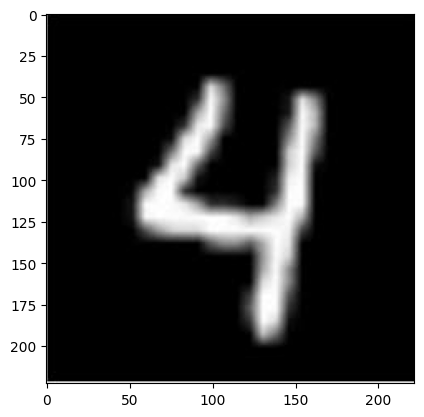

In [ ]:
plt.imshow(img, cmap = 'gray')
print(img.shape)

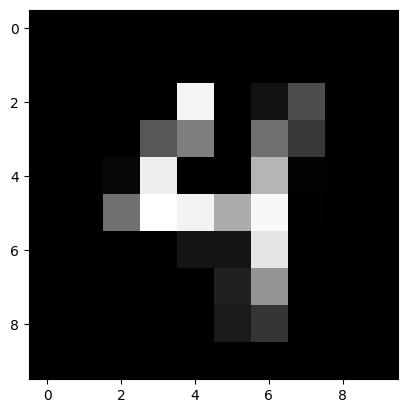

In [ ]:
img_resize=cv2.resize(img,(10,10))
plt.imshow(img_resize, cmap = 'gray')


In [ ]:
print(img_resize)

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0 242   0  17  76   0   0]
 [  0   0   0  86 125   0 111  57   0   0]
 [  0   0   7 236   0   0 179   2   0   0]
 [  0   0 113 252 239 169 245   1   0   0]
 [  0   0   0   0  20  20 226   0   0   0]
 [  0   0   0   0   0  32 147   0   0   0]
 [  0   0   0   0   0  26  52   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


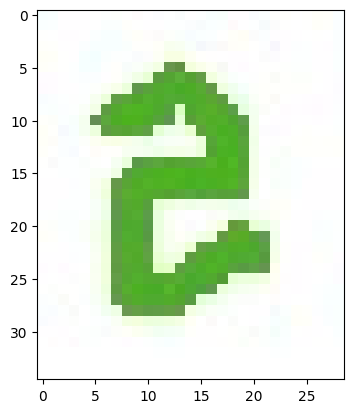

In [ ]:
img_col=cv2.imread('/content/drive/MyDrive/NNDL-Data/digit2small.jpg')
plt.imshow(img_col)

In [ ]:
print(img_col.shape)

(35, 29, 3)


In [ ]:
print(img_col)

[[[246 255 255]
  [248 255 255]
  [255 254 255]
  ...
  [255 255 248]
  [255 255 249]
  [251 255 255]]

 [[250 255 255]
  [251 255 255]
  [255 254 255]
  ...
  [255 255 249]
  [255 255 251]
  [251 254 255]]

 [[255 255 254]
  [255 255 255]
  [255 253 255]
  ...
  [255 255 254]
  [255 255 255]
  [251 254 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
img_resize_col = cv2.resize(img_col, (4, 2))

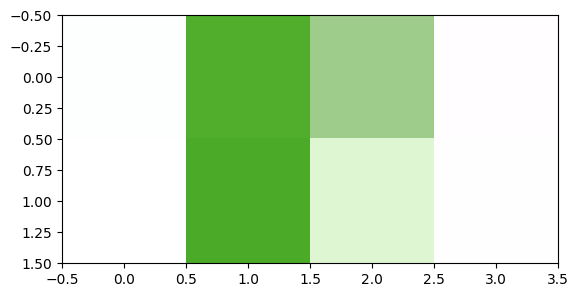

In [ ]:
plt.imshow(img_resize_col)

In [ ]:
print(img_resize_col)

[[[253 254 254]
  [ 80 174  44]
  [158 204 139]
  [255 253 255]]

 [[254 255 254]
  [ 75 171  41]
  [223 246 210]
  [255 254 255]]]


# **Image Classification Using ANN**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam,Adamax,Nadam
import pylab as plt

In [ ]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


Label: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


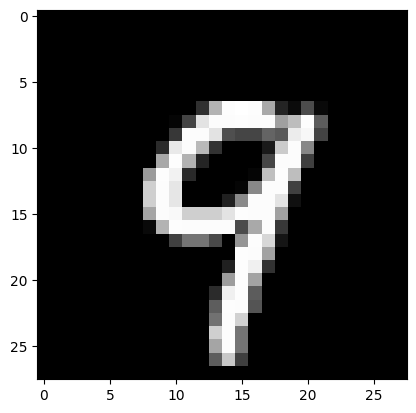

In [ ]:
print("Label:",y_test[12:13])
plt.imshow(x_test[12:13].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 1.6262 - accuracy: 0.4861
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.7461 - accuracy: 0.7969


In [ ]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5671043992042542
Test accuracy: 0.8561000227928162


In [ ]:
# Write the index of the test sample to test
prediction = model.predict(x_test[88:89])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 127ms/step
Prediction
 [7.1226163e-03 4.7441217e-04 2.0789133e-02 1.2108175e-04 2.5823783e-02
 9.6156466e-04 9.4101828e-01 1.5792105e-03 1.0764346e-04 2.0022055e-03]

Thresholded output
 [0 0 0 0 0 0 1 0 0 0]


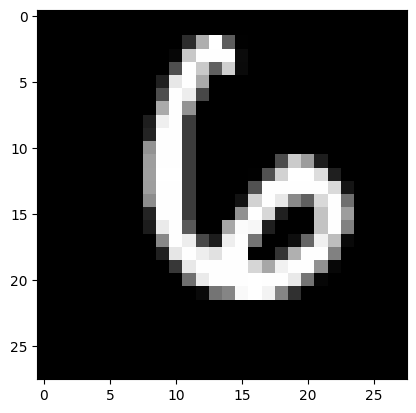

In [ ]:
plt.imshow(x_test[88:89].reshape(28,28), cmap='gray')
plt.show()

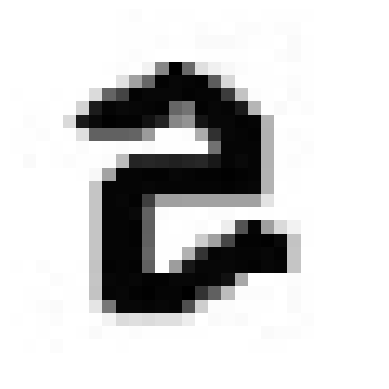

In [ ]:
import cv2
image = cv2.imread('/content/drive/MyDrive/NNDL-Data/digit2small.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28))
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

1/1 [==============================] - 0s 75ms/step
Prediction Score:
 [1.8448692e-02 7.3699187e-04 1.4697769e-02 1.6153972e-01 3.7168761e-04
 5.4963261e-01 3.5704815e-04 1.7393414e-02 2.3252213e-01 4.2999815e-03]

Thresholded Score:
 [0 0 0 0 0 1 0 0 0 0]

Predicted Digit:
 5


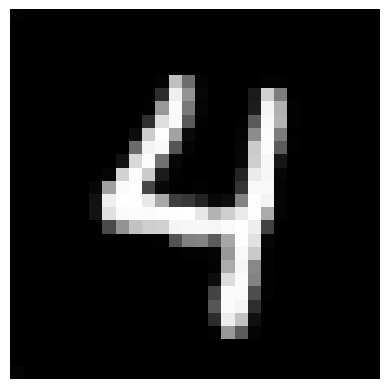

In [ ]:
import cv2
image = cv2.imread('/content/drive/MyDrive/NNDL-Data/digit4.jpg', 0)
image_resized = cv2.resize(image, (28, 28))
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

1/1 [==============================] - 0s 26ms/step
Prediction Score:
 [1.0393547e-03 1.2531745e-03 1.2892722e-03 3.4611319e-05 7.5988477e-01
 1.2598808e-03 4.1096769e-02 4.0247347e-02 1.5000744e-03 1.5239473e-01]

Thresholded Score:
 [0 0 0 0 1 0 0 0 0 0]

Predicted Digit:
 4


In [ ]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 5s 7ms/step - loss: 0.4708 - accuracy: 0.8802
Epoch 2/2
469/469 [==============================] - 4s 8ms/step - loss: 0.3553 - accuracy: 0.9084
Test loss: 0.32034096121788025
Test accuracy: 0.9193999767303467


#**Image Classification Using ANN - Custom Data**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

import numpy as np
import pandas as pd

import keras

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from keras import models
from keras.models import Sequential
#from keras.models import Model
from keras.models import load_model

from keras.layers import Input, Dropout, BatchNormalization, GlobalAveragePooling2D, Dense
from keras.callbacks import Callback, ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')

In [ ]:
img_width, img_height = 150, 150
input_shape = (img_height, img_width, 3)
nb_train_samples = 4
nb_val_samples = 4
nb_epochs = 10
num_classes=2

In [ ]:
train_data_dir = '/content/drive/MyDrive/NNDL-Data/train'
val_data_dir = '/content/drive/MyDrive/NNDL-Data/validation'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(1, 67500),
                                                    batch_size=1, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(1, 67500),
                                                        batch_size=1,class_mode='categorical')

Found 4 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [ ]:
x_train = x_train.reshape(2, 67500)
x_test = x_test.reshape(2, 67500)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

ValueError: ignored

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(67500,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                2160032   
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2162210 (8.25 MB)
Trainable params: 2162210 (8.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint("best_Model.h5",save_best_only=True)

In [ ]:
history = model.fit_generator(train_generator, callbacks = model_checkpoint_callback, steps_per_epoch=nb_train_samples,epochs=nb_epochs, validation_data=validation_generator, validation_steps=nb_val_samples, verbose=1)
print('Training Completed!')
print(history.history.keys())

Epoch 1/10


ValueError: ignored

#**Tumor Detection**

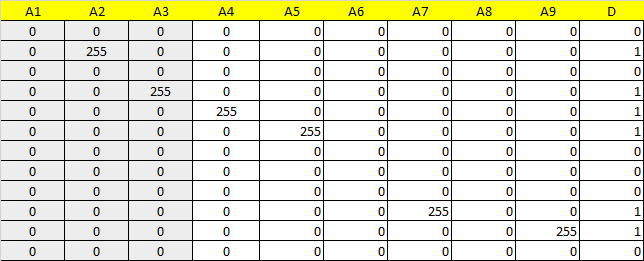

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_excel("/content/drive/MyDrive/NNDL-Data/SampleData-05.xlsx")
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,D
0,0,0,0,0,0,0,0,0,0,0
1,0,255,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0
3,0,0,255,0,0,0,0,0,0,1
4,0,0,0,255,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
data=ms.fit_transform(data)
print(data)
print(data.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(12, 10)


In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.5,random_state=1)
q1=len(data_train)
q2=len(data_test)
data_train=np.array(data_train)
data_test=np.array(data_test)

In [ ]:
#Random Weight Initialization
weights=np.random.uniform(-10,10,size=(9,1))
bias=np.random.uniform(-10,10,size=(1,1))
print(weights)
print(bias)

[[-3.65600873]
 [ 3.55557192]
 [-7.65384605]
 [ 3.03066703]
 [-2.11131184]
 [ 2.13394327]
 [ 9.88647664]
 [ 6.35746819]
 [-9.45051973]]
[[4.89398732]]


In [ ]:
l=0.01
for i in range(10000):
    for j in range(q1):
        net=np.dot(data_train[[j],0:9],weights)+bias #n.shape-1,1
        o=1/(1+np.exp(-net))
        dw=np.dot(l*(data_train[[j],9]-o),data_train[[j],0:9])
        db=l*(data_train[[j],9]-o)
        weights=weights+dw.T
        bias=bias+db
print(bias)
print(weights)


[[-4.74447247]]
[[-3.65600873]
 [ 3.55557192]
 [-7.65384605]
 [ 3.03066703]
 [ 8.60466703]
 [ 2.13394327]
 [10.14030021]
 [ 6.35746819]
 [-9.45051973]]


In [ ]:
pred_test=np.zeros((q2,1))
for j in range(q2):
    net=np.dot(data_test[[j],0:9],weights)+bias #n.shape-1,1
    o=1/(1+np.exp(-net))
    pred_test[j]=np.round(o)
pred_test

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
pred_train=np.zeros((q1,1))
o=np.zeros((q1,1))
for j in range(q1):
    net=np.dot(data_train[[j],0:9],weights)+bias #n.shape-1,1
    o[j]=1/(1+np.exp(-net))
    pred_train[j]=np.round(o[j])
pred_train

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.]])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
confusion_matrix(data_train[:,9], pred_train)

array([[4, 0],
       [0, 2]])

In [ ]:
accuracy_score(data_train[:,9], pred_train)

1.0

In [ ]:
confusion_matrix(data_test[:,9], pred_test)

array([[2, 0],
       [4, 0]])

In [ ]:
accuracy_score(data_test[:,9], pred_test)

0.3333333333333333

In [ ]:
inputvector=np.zeros((1,9))
for j in range(9):
  A=input("enter value")
  inputvector[0,j]=A

net=np.dot(inputvector[[0],0:9],weights)+bias #n.shape-1,1
o=1/(1+np.exp(-net))
pred=np.round(o)
print("Predicted Output:",pred)

enter value0
enter value1
enter value0
enter value0
enter value


ValueError: ignored

# **Binary Classification - No Lib**

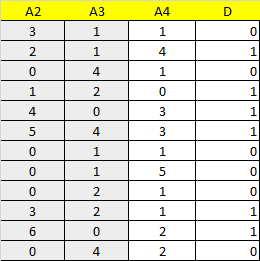

In [ ]:
data=pd.read_excel("/content/drive/MyDrive/NNDL-Data/SampleData-06.xlsx")
data.head()

,A2,A3,A4,D
0,3,1,1,0
1,2,1,4,1
2,0,4,1,0
3,1,2,0,1
4,4,0,3,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
data=ms.fit_transform(data)
print(data)
print(data.shape)

[[0.5        0.25       0.2        0.        ]
 [0.33333333 0.25       0.8        1.        ]
 [0.         1.         0.2        0.        ]
 [0.16666667 0.5        0.         1.        ]
 [0.66666667 0.         0.6        1.        ]
 [0.83333333 1.         0.6        1.        ]
 [0.         0.25       0.2        0.        ]
 [0.         0.25       1.         0.        ]
 [0.         0.5        0.2        0.        ]
 [0.5        0.5        0.2        1.        ]
 [1.         0.         0.4        1.        ]
 [0.         1.         0.4        0.        ]]
(12, 4)


In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.25,random_state=1)
q1=len(data_train)
q2=len(data_test)
data_train=np.array(data_train)
data_test=np.array(data_test)

In [ ]:
# Random weight initialization
w_ij=np.random.uniform(-1,1,size=(3,5))
w_jk=np.random.uniform(-1,1,size=(5,1))
b_j=np.random.uniform(-1,1,size=(5,1))
b_k=np.random.uniform(-1,1,size=(1,1))
print(w_ij.shape,w_ij)
print(w_jk.shape,w_jk)
print(b_j)
print(b_k)

(3, 5) [[ 0.12196703 -0.43549943 -0.55714478  0.4922626   0.05594656]
 [ 0.09845169 -0.54332822  0.35483638  0.36945791 -0.79939308]
 [ 0.0520856  -0.60494459 -0.78667932  0.27528396  0.80224738]]
(5, 1) [[-0.85116835]
 [ 0.12831029]
 [ 0.76490278]
 [ 0.30685391]
 [ 0.57409106]]
[[-0.13640938]
 [-0.15410152]
 [-0.11997217]
 [ 0.67912486]
 [ 0.38199694]]
[[0.62605565]]


In [ ]:
#Forward pass
def forward_pass(a,w_ij,w_jk,b_j,b_k,j):
    net_j=np.dot(a[[j],0:3],w_ij)+b_j.T
    o_j=1/(1+np.exp(-net_j))
    net_k=np.dot(o_j,w_jk)+b_k
    o_k=1/(1+np.exp(-net_k))
    return o_j,o_k

In [ ]:
#Backward pass
def weights_updation_bp(a,l,o_j,o_k,w_ij,w_jk,b_j,b_k,j):
    dw_ij=np.zeros((3,5))
    db_j=np.zeros((1,5))
    dw_jk=np.dot(l*(a[[j],3]-o_k),o_j)
    w_jk=w_jk+dw_jk.T
    db_k=l*(a[[j],3]-o_k)
    b_k=b_k+db_k
    for k in range(5):
        dw_ij[:,k]=np.dot(l*(a[[j],3]-o_k)*w_jk[[k]]*o_j[0,k]*(1-o_j[0,k]),a[[j],0:3])
        db_j[:,k]=l*(a[[j],3]-o_k)*w_jk[[k]]*o_j[0,k]*(1-o_j[0,k])
    w_ij=w_ij+dw_ij
    b_j=b_j+db_j.T
    return w_jk,w_ij,b_j,b_k

In [ ]:
#Neural Nets
l=0.001
for i in range(100):
    for j in range(q1):
        o_j,o_k=forward_pass(data_train,w_ij,w_jk,b_j,b_k,j)
        w_jk,w_ij,b_j,b_k=weights_updation_bp(data_train,l,o_j,o_k,w_ij,w_jk,b_j,b_k,j)
print(w_jk)
print(w_ij)
print(b_j)
print(b_k)

[[-0.95819284]
 [ 0.04579283]
 [ 0.66156633]
 [ 0.15211774]
 [ 0.44941657]]
[[ 0.110501   -0.43482748 -0.5501958   0.49380991  0.06162976]
 [ 0.12112288 -0.54538443  0.33668616  0.36460407 -0.81172913]
 [ 0.06918764 -0.60647755 -0.79972719  0.27153429  0.79376953]]
[[-0.08627562]
 [-0.15864291]
 [-0.15967689]
 [ 0.66837632]
 [ 0.35490333]]
[[0.40443943]]


In [ ]:
pred_test=np.zeros((q2,1))
for z in range(q2):
    _,pred_test[z]=forward_pass(data_test,w_ij,w_jk,b_j,b_k,z)
pred_test=np.round(pred_test)
print(pred_test)

[[1.]
 [1.]
 [1.]]


In [ ]:
pred_train=np.zeros((q1,1))
for z in range(q1):
    _,pred_train[z]=forward_pass(data_train,w_ij,w_jk,b_j,b_k,z)
pred_train=np.round(pred_train)
print(pred_train)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
confusion_matrix(data_train[:,3], pred_train)

array([[0, 5],
       [0, 4]])

In [ ]:
confusion_matrix(data_test[:,3], pred_test)

array([[0, 1],
       [0, 2]])

In [ ]:
print("Training Accuracy",accuracy_score(data_train[:,3], pred_train))
print("Testing Accuracy",accuracy_score(data_test[:,3], pred_test))

Training Accuracy 0.4444444444444444
Testing Accuracy 0.6666666666666666


# **Clustering**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#data=pd.read_excel("/content/drive/MyDrive/NNDL-Data/Sample_Data_Clust.xlsx")
data=pd.read_excel("/content/drive/MyDrive/NNDL-Data/Sample_Data_Clust2.xlsx")
data.head()

,Hostel,Class Room,Lab
0,3.0,0.3,0.1
1,5.0,0.4,0.2
2,4.0,0.5,0.1
3,0.3,3.0,4.0
4,0.4,5.0,6.0


In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.05,random_state=1)
q1=len(data_train)
q2=len(data_test)
data_train=np.array(data_train)
data_test=np.array(data_test)

In [ ]:
#Random Weight Initialization
weights=np.random.uniform(-10,10,size=(3,2))
print(weights)

[[ 0.84649344  6.21076622]
 [ 9.11805125  7.49110887]
 [-2.44370168  3.84098697]]


In [ ]:
l=0.9
for i in range(10000):
    for j in range(q1):
        z=np.dot(data_train[j,0:3],weights) #n.shape-1,1
        c=np.argmax(z)
        dw=l*(data_train[j,0:3]-weights[:,c])
        weights[:,c]=weights[:,c]+dw
print(weights)

[[0.48108108 3.18181818]
 [3.91891892 0.30909091]
 [6.72072072 0.10909091]]


In [ ]:
pred_train=np.zeros((q1,2))
pred_Day=[]
for j in range(q1):
    pred_train[j,:]=np.dot(data_train[j,0:3],weights)
    if(np.argmax(pred_train[j,:])==1):
      s="working Day"
      pred_Day.append(s)
    else:
      s="Non-working Day"
      pred_Day.append(s)
print(pred_Day)
print(pred_train)

['working Day', 'Non-working Day', 'working Day', 'Non-working Day', 'Non-working Day']
[[ 5.31711712 16.05454545]
 [60.11135135  3.47272727]
 [ 3.29099099  9.64909091]
 [38.78396396  2.31818182]
 [62.96126126  3.59090909]]


In [ ]:
pred_test=np.zeros((q2,2))
for j in range(q2):
    pred_test[j,:]=np.dot(data_test[j,0:3],weights)
print(np.round(pred_test))
if(np.argmax(pred_test)==1):
  print("working Day")
else:
  print("Non-working Day")


[[ 5. 13.]]
working Day


#Thank You